# What is the True Normal Human Body Temperature?
#### Background
The mean normal body temperature was held to be 37∘C or 98.6∘ F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

## Exercises
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
from scipy import stats

In [19]:
df = pd.read_csv('data/human_body_temperature.csv')

In [20]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1.Is the distribution of body temperatures normal?

Per graph the distribution seems fairly normal.

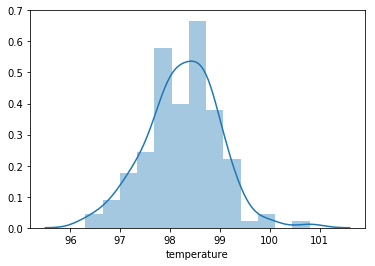

In [21]:
body_temp = df['temperature']
sns.distplot(body_temp)

## 2. Is the sample size large? Are the observations independent?

In [22]:
len(df)

130

We have 130 samples. Since, it is greater than 30 observations which makes it sufficiently large for our purpose of hypothesis testing. These observations are independent means the outcome of one sample would provide no information about another sample.

## 3. Is the true population mean really 98.6 degrees F?

In [23]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


Hypotheses:

H0: body_temp=98.6

1. I will use 10000 samples for the bootstrap hypothesis test 
2. I will use a one-sample test since only one sample data set was given. 
3. I would use the t statistic since the population's standard deviation is unknown.

In [24]:
bs_replicates = np.empty(10000)

size = len(bs_replicates)

for i in range(size):
    bs_sample = np.random.choice(df['temperature'], len(df['temperature']))
    bs_replicates[i] = np.mean(bs_sample)
    
p = np.sum(bs_replicates >= 98.6) / size

print('p-value: {}'.format(p))
print('mean: {:0.5}'.format(np.mean(bs_replicates)))

p-value: 0.0
mean: 98.249


After 10,000 samples, the p-value is 0.0, indicating that the null hypothesis should be rejected. 

In [25]:
mean_temp=df['temperature'].mean()
print('Mean temperature of the sample is: {:.2f}'.format(mean_temp))

Mean temperature of the sample is: 98.25


In [26]:
one_sample = stats.ttest_1samp(df['temperature'], popmean=98.6)
print('The t-statistic is %.3f and the p-value is %.10f.' % one_sample)

The t-statistic is -5.455 and the p-value is 0.0000002411.


## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [27]:
sample_temperature = np.random.choice(a = df['temperature'], size=10)

The t-test is the only option availabl because the population standard deviation is unknown.  

In [28]:
small_sample = stats.ttest_1samp(sample_temperature, popmean=98.6)
print('The t-statistic is %.3f and the p-value is %.10f.' % small_sample)

The t-statistic is -0.449 and the p-value is 0.6637434808.


The p-value is greater than 0.05, so the null hypothesis cannot be rejected on the basis of this test.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [29]:
bootstrap_replicates = np.empty(10000)

size = len(bootstrap_replicates)

for i in range(size):
    bootstrap_sample = np.random.choice(df['temperature'], size=len(df['temperature']))
    bootstrap_replicates[i] = np.mean(bootstrap_sample)

p = np.sum(bootstrap_replicates >= 98.6) / len(bootstrap_replicates)
print('p-value: {}'.format(p))

p-value: 0.0


In [30]:
conf_int = np.percentile(bootstrap_replicates, [2.5, 97.5])
print('95% confidence interval =', conf_int, 'temperature')

95% confidence interval = [98.12153846 98.37463462] temperature


If someone's body temperature lower than 98.12 or higher than 98.37 to be considered abnormal. Only 5% of the population's body temperature expect  to be <98.12 or >98.37.

## 6. Is there a significant difference between males and females in normal temperature?

In [31]:
males = df[df.gender == 'M']
females = df[df.gender == 'F']

print('Of the {} participants, {} are female and {} are male.'.format(len(males + females), len(females), len(males)))

Of the 130 participants, 65 are female and 65 are male.


A two-sample t-test is more suitable than a one-sample t-test. 

In [32]:
two_sample=stats.ttest_ind(males['temperature'],females['temperature'])
print('The T-statistic is %.3f and the p-value is %.3f'%two_sample)

The T-statistic is -2.285 and the p-value is 0.024


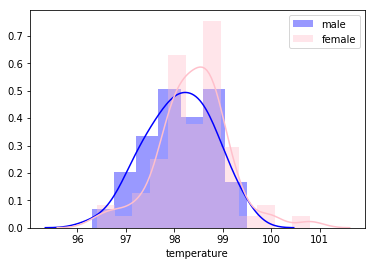

In [33]:
sns.distplot(males['temperature'], label='male',color='blue')
sns.distplot(females['temperature'], label='female',color='pink')
plt.legend()

Females body temperature is different than males body temperature wit %95 confidence.